In [9]:
#Library Import
import pandas as pd
import numpy as np
import urllib
import requests

import seaborn as sns
from matplotlib import pyplot as plt
import collections 
from sklearn import svm, datasets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [137]:
#Data Import
from google.colab import files
uploaded_files = files.upload()

Saving Iris converted.csv to Iris converted.csv


In [10]:
dataset = pd.read_csv('Iris converted.csv', delimiter=',')
dataset.drop(columns="Id",inplace=True)
dataset.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [110]:
#Statistic Description
dataset.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [16]:
#data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
#null checker
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

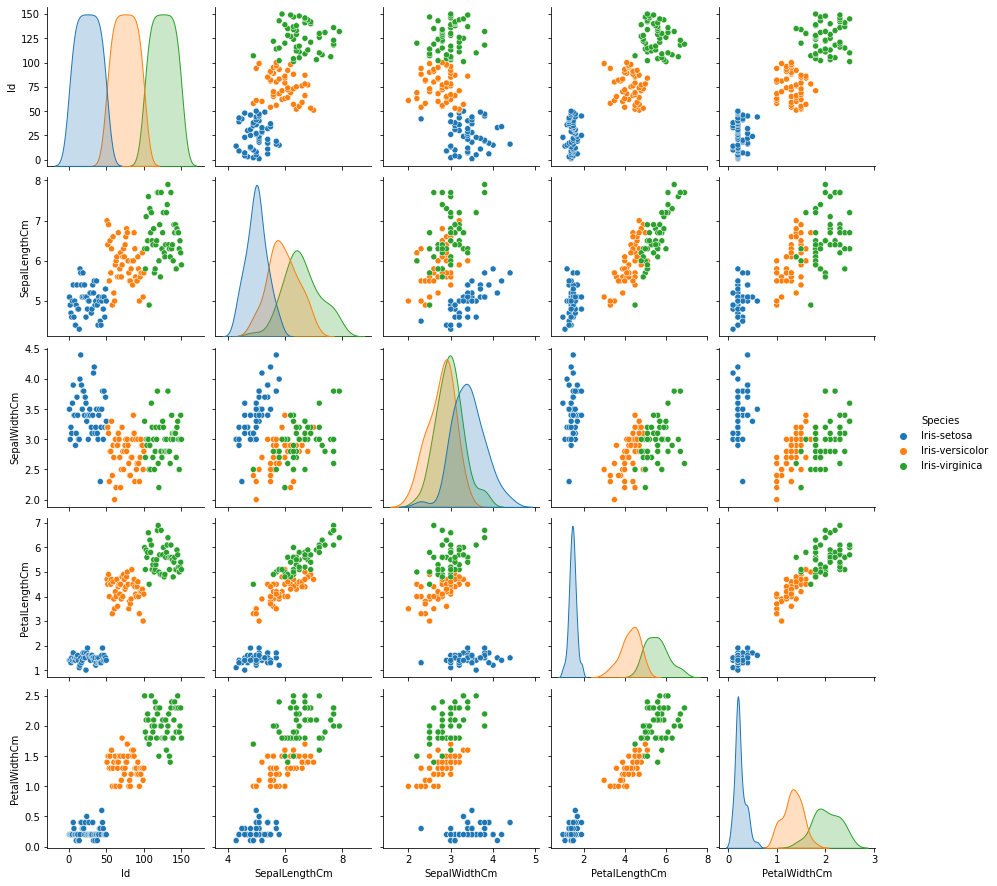

In [21]:
#Visualize
sns.pairplot(dataset,hue="Species")
plt.show()

In [22]:
#Dataset corellation
dataset.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


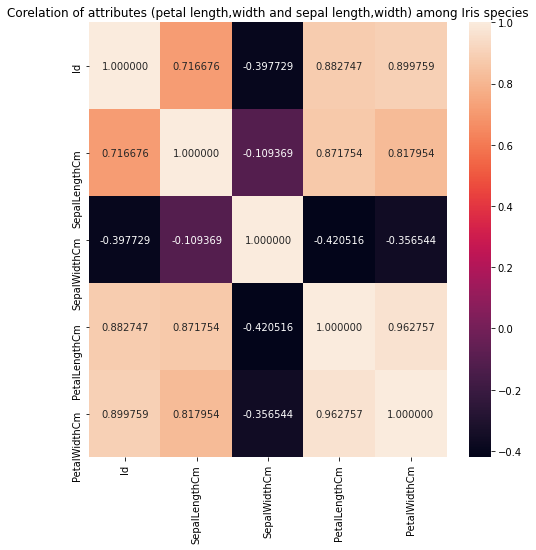

In [25]:
#heatmap plot
plt.subplots(figsize = (8,8))
sns.heatmap(dataset.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

In [165]:
train, test= train_test_split( dataset, test_size=0.5)
print ('Train set:', X_train.shape)
print ('Test set:', X_test.shape)

Train set: (105, 4)
Test set: (45, 4)


In [139]:
#LVQ Algorithm
from random import seed
from random import randrange
from csv import reader
from math import sqrt
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
        
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
 
# Locate the best matching unit
def get_best_matching_unit(codebooks, test_row):
	distances = list()
	for codebook in codebooks:
		dist = euclidean_distance(codebook, test_row)
		distances.append((codebook, dist))
	distances.sort(key=lambda tup: tup[1])
	return distances[0][0]
 
# Make a prediction with codebook vectors
def predict(codebooks, test_row):
	bmu = get_best_matching_unit(codebooks, test_row)
	return bmu[-1]
 
# Create a random codebook vector
def random_codebook(train):
	n_records = len(train)
	n_features = len(train[0])
	codebook = [train[randrange(n_records)][i] for i in range(n_features)]
	return codebook
 
# Train a set of codebook vectors
def train_codebooks(train, n_codebooks, lrate, epochs):
	codebooks = [random_codebook(train) for i in range(n_codebooks)]
	for epoch in range(epochs):
		rate = lrate * (1.0-(epoch/float(epochs)))
		for row in train:
			bmu = get_best_matching_unit(codebooks, row)
			for i in range(len(row)-1):
				error = row[i] - bmu[i]
				if bmu[-1] == row[-1]:
					bmu[i] += rate * error
				else:
					bmu[i] -= rate * error
	return codebooks
 
# LVQ Algorithm
def learning_vector_quantization(train, test, n_codebooks, lrate, epochs):
	codebooks = train_codebooks(train, n_codebooks, lrate, epochs)
	predictions = list()
	for row in test:
		output = predict(codebooks, row)
		predictions.append(output)
	return(predictions)

In [208]:
#Training Param
learn_rate = 0.8
n_epochs = 100
n_codebooks = 20

In [209]:
#Predict
predictions = learning_vector_quantization(X_train,X_test, n_codebooks, learn_rate, n_epochs)
print(predictions [0:5])

[0.2, 0.2, 0.2, 0.2, 0.2]


In [210]:
#Evaluate Accuracy
classIndex = len(X_test[0])-1
testClass = X_test[:, classIndex]
accuracy = accuracy_metric(testClass, predictions)
print(accuracy)

15.555555555555555


In [119]:
!pip install -U sklearn-lvq
!pip install -U library_lvq

Requirement already up-to-date: sklearn-lvq in /usr/local/lib/python3.6/dist-packages (1.1.1)
ERROR: Could not find a version that satisfies the requirement library_lvq (from versions: none)
ERROR: No matching distribution found for library_lvq


In [125]:
from sklearn_lvq import RslvqModel
from sklearn_lvq import GlvqModel
from sklearn_lvq import GmlvqModel
from sklearn_lvq import GrlvqModel
from sklearn_lvq.utils import plot2d

In [30]:
#Data Splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)

not implemented!


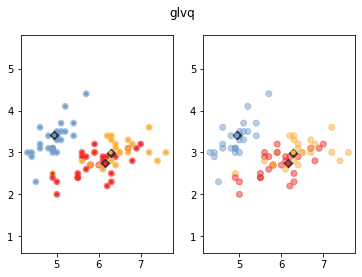

In [214]:
glvq = GlvqModel()
glvq.fit(X_train, y_train)
plot2d(glvq, X_train, y_train, 1, 'glvq')

In [215]:
print('classification accuracy:', glvq.score(X_train,y_train))
plt.show()

classification accuracy: 0.9733333333333334


variance coverd by projection: 99.99999999309847


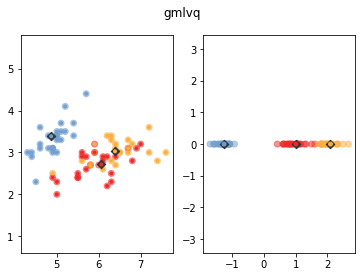

In [216]:
gmlvq = GmlvqModel()
gmlvq.fit(X_train, y_train)
plot2d(gmlvq, X_train, y_train, 1, 'gmlvq')

In [217]:
print('classification accuracy:', gmlvq.score(X_train, y_train))
plt.show()

classification accuracy: 0.9733333333333334


variance coverd by projection: 99.99998706887816


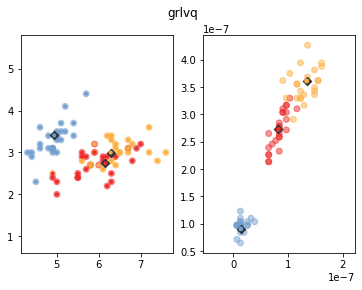

In [218]:
grlvq = GrlvqModel()
grlvq.fit(X_train, y_train)
plot2d(grlvq, X_train, y_train, 1, 'grlvq')

In [219]:
print('classification accuracy:', grlvq.score(X_train, y_train))
plt.show()

classification accuracy: 0.96


In [44]:
from LVQClassifier import LVQClassifier as LVQ
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)

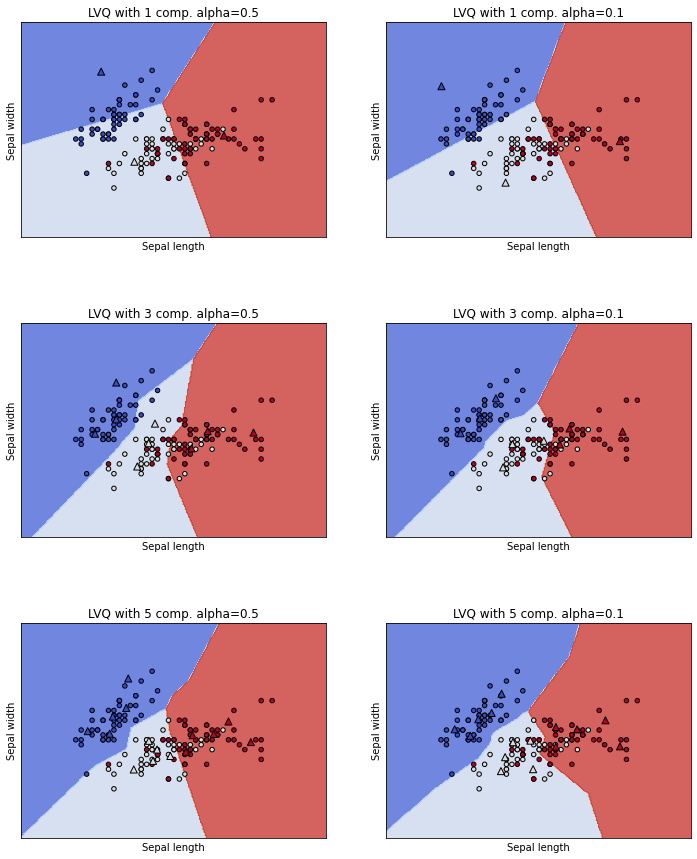

In [53]:
from sklearn.datasets import load_iris
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional 
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a 
# two-dim dataset 
X = iris.data[:, :2]
y = iris.target

# LVQ parameter
epochs = 10
LVQ2 = False
models = (LVQ(n_components=1,alpha=0.5,epochs=epochs,LVQ2=LVQ2),
          LVQ(n_components=1,alpha=0.1,epochs=epochs,LVQ2=LVQ2),
          LVQ(n_components=3,alpha=0.5,epochs=epochs,LVQ2=LVQ2),
          LVQ(n_components=3,alpha=0.1,epochs=epochs,LVQ2=LVQ2),
          LVQ(n_components=5,alpha=0.5,epochs=epochs,LVQ2=LVQ2),
          LVQ(n_components=5,alpha=0.1,epochs=epochs,LVQ2=LVQ2))

models = (clf.fit(X, y) for clf in models) # sklearn loop over the models

# title for the plots
titles = ('LVQ with 1 comp. alpha=0.5',
          'LVQ with 1 comp. alpha=0.1',
          'LVQ with 3 comp. alpha=0.5',
          'LVQ with 3 comp. alpha=0.1',
          'LVQ with 5 comp. alpha=0.5',
          'LVQ with 5 comp. alpha=0.1')

fig, sub = plt.subplots(3, 2, figsize=(12,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()): 
    X_LVQ = clf.weights
    y_LVQ = clf.label_weights 
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.scatter(X_LVQ[:, 0], X_LVQ[:, 1], c=y_LVQ,
               cmap=plt.cm.coolwarm, s=50, marker='^', edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()